In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN
import seaborn as sns
import umap

Implementing UMAP

In [2]:
spending_data = pd.read_csv('C:/Users/camer/OneDrive/Documents/Data Science MSc/DSMP/New_data_proportional_spending.csv')
spending_data.head()

,Account No,Art/Hobby Supplies,Bookshop,Children,Coffee,Fashion,Financial Services,Food Delivery,Gaming,Healthcare,Hospitality,Misc/General Retail,Sport/Fitness,Streaming Services,Supermarket
0,101531259.0,0.003172,-0.006441,-0.000227,-0.00257,-0.107178,0.334652,-0.022209,-0.037189,-0.005058,-0.000677,-0.036840,-0.008296,-0.010189,-0.100951
1,104832000.0,-0.023672,-0.006441,-0.000227,-0.00257,-0.234301,0.363986,-0.014622,0.031884,-0.004625,-0.000677,-0.036777,-0.045812,-0.004240,-0.021907
2,105375973.0,-0.023672,0.039468,-0.000227,-0.00257,0.108722,-0.248262,-0.013770,-0.037189,0.001799,0.000604,0.229307,0.153014,0.003449,-0.210673
3,106601471.0,-0.023672,0.019256,-0.000227,-0.00257,0.267886,-0.248262,0.024152,0.084290,0.015439,0.002396,0.047479,-0.092577,0.009065,-0.102657
4,108481285.0,0.012814,0.004258,-0.000227,-0.00257,0.148623,-0.248262,-0.021637,-0.037189,0.051563,-0.000677,0.150079,0.056770,-0.008081,-0.105464


In [4]:
X = spending_data.drop('Account No', axis=1)

(976, 2)


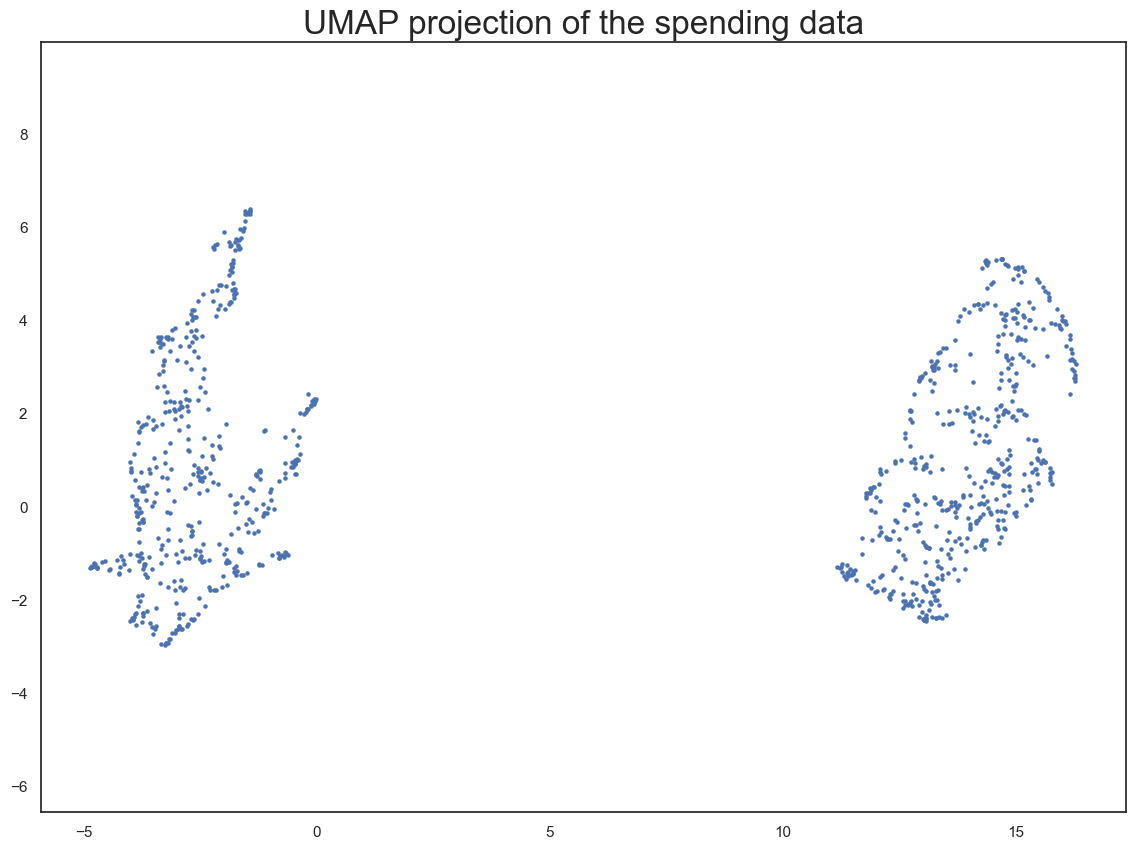

In [31]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

umap_model = umap.UMAP(n_neighbors = 15)

spending_umap = umap_model.fit_transform(X)
print(spending_umap.shape)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spending data', fontsize=24);

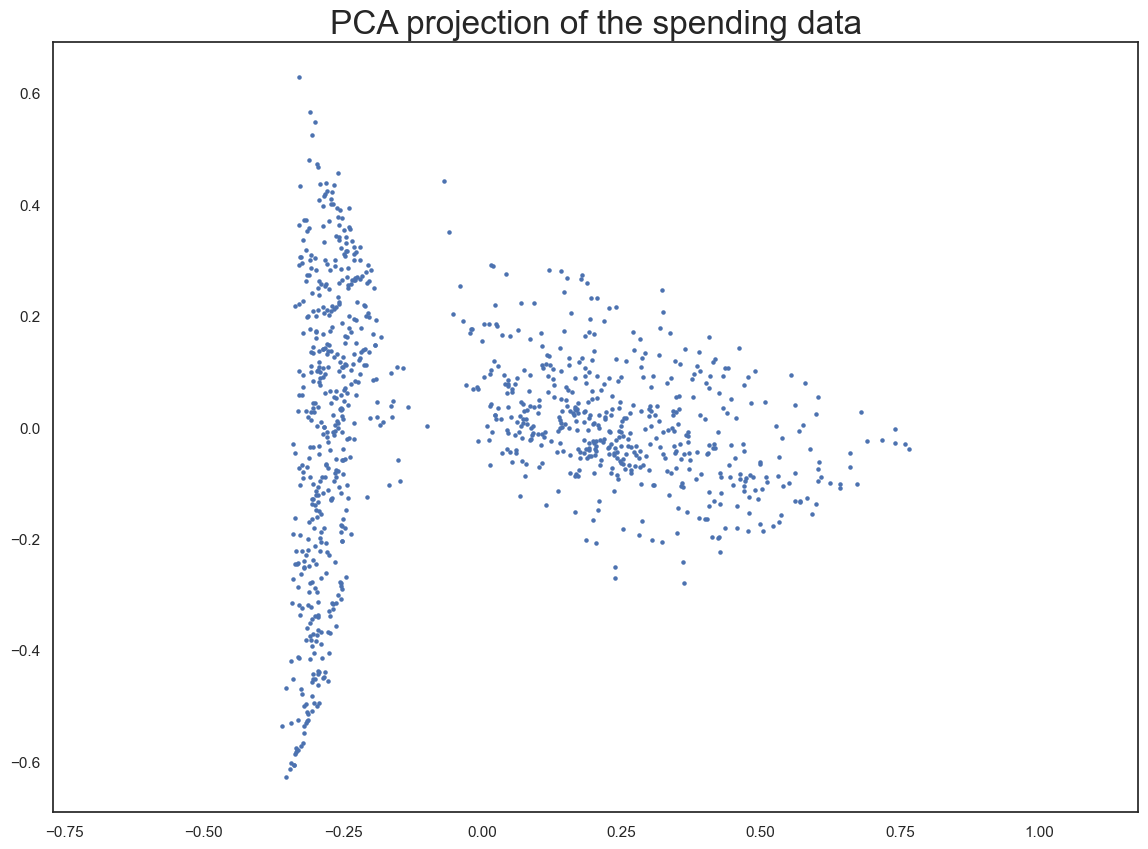

In [28]:
from sklearn.decomposition import PCA
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
pca = PCA()
spending_pca = pca.fit_transform(X)

plt.scatter(
    spending_pca[:, 0],
    spending_pca[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the spending data', fontsize=24);

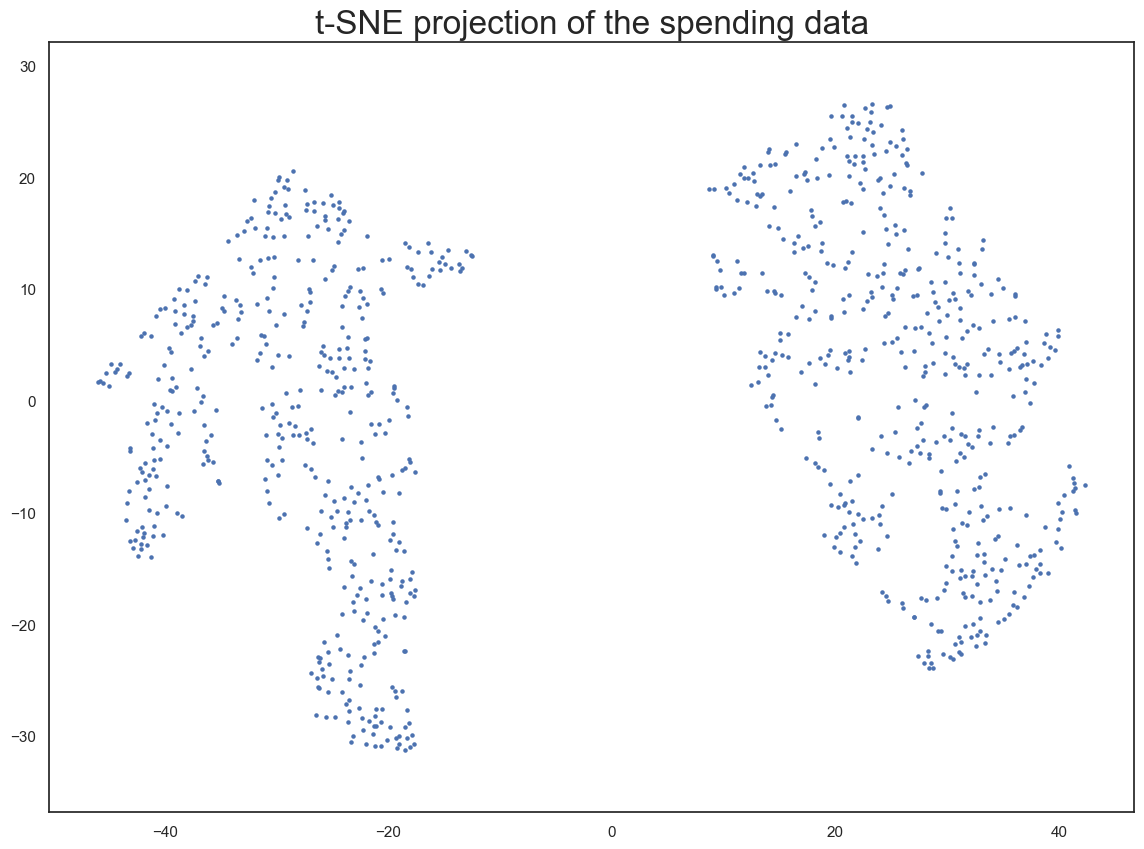

In [30]:
from sklearn.manifold import TSNE

spending_tsne = TSNE().fit_transform(X)

plt.scatter(
    spending_tsne[:, 0],
    spending_tsne[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of the spending data', fontsize=24);

In [32]:
hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

In [33]:
spending_data['cluster_label'].value_counts()

cluster_label
0    502
1    474
Name: count, dtype: int64

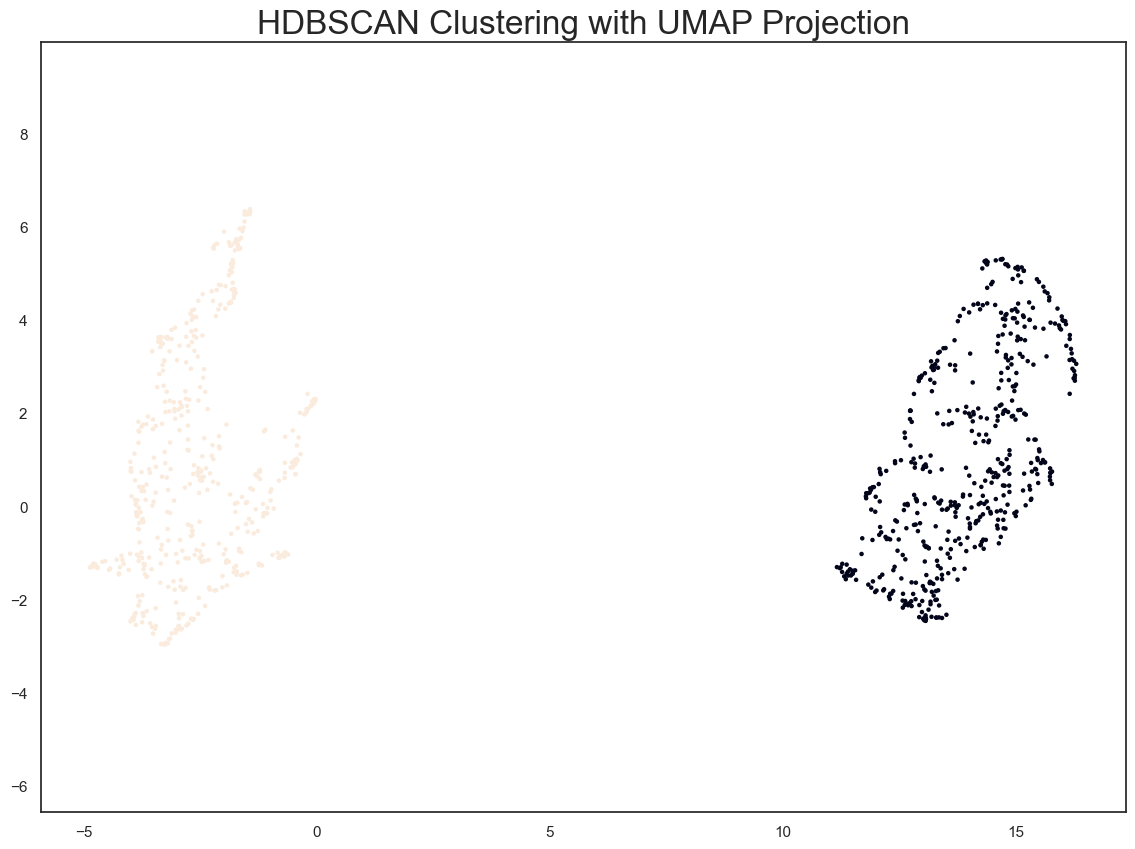

In [34]:
plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()

In [41]:
cluster_of_interest = 1

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=6)

sample_accounts.set_index('Account No', inplace=True)
sample_accounts

,Art/Hobby Supplies,Bookshop,Children,Coffee,Fashion,Financial Services,Food Delivery,Gaming,Healthcare,Hospitality,Misc/General Retail,Sport/Fitness,Streaming Services,Supermarket,cluster_label
Account No,,,,,,,,,,,,,,,
399144202.0,0.022045,-0.003084,-0.000227,-0.002570,-0.022005,-0.248262,0.232111,-0.024108,0.027460,0.001641,0.102477,0.028694,-0.010945,-0.103229,1
970298834.0,0.033408,0.001788,-0.000227,-0.002570,0.169524,-0.248262,-0.014275,0.018654,0.008903,0.000665,0.026434,0.169558,-0.002334,-0.161267,1
143383029.0,-0.023672,-0.006441,-0.000227,-0.002570,0.198042,-0.248262,0.005169,0.050934,-0.005058,0.000079,-0.004435,-0.125630,0.006705,0.155364,1
690958123.0,0.039001,-0.004314,-0.000227,0.065277,0.082727,-0.248262,-0.022689,-0.015594,0.004611,-0.000677,-0.003375,-0.013807,0.002952,0.114375,1
767447966.0,0.053691,-0.006441,-0.000227,0.001573,-0.015342,-0.248262,-0.008890,0.033994,-0.005058,-0.000677,-0.019048,0.122552,0.003431,0.088703,1
387957305.0,-0.001647,-0.006441,-0.000227,0.028543,0.118887,-0.248262,-0.023268,-0.037189,-0.005058,-0.000677,-0.009095,-0.055445,0.025847,0.214033,1


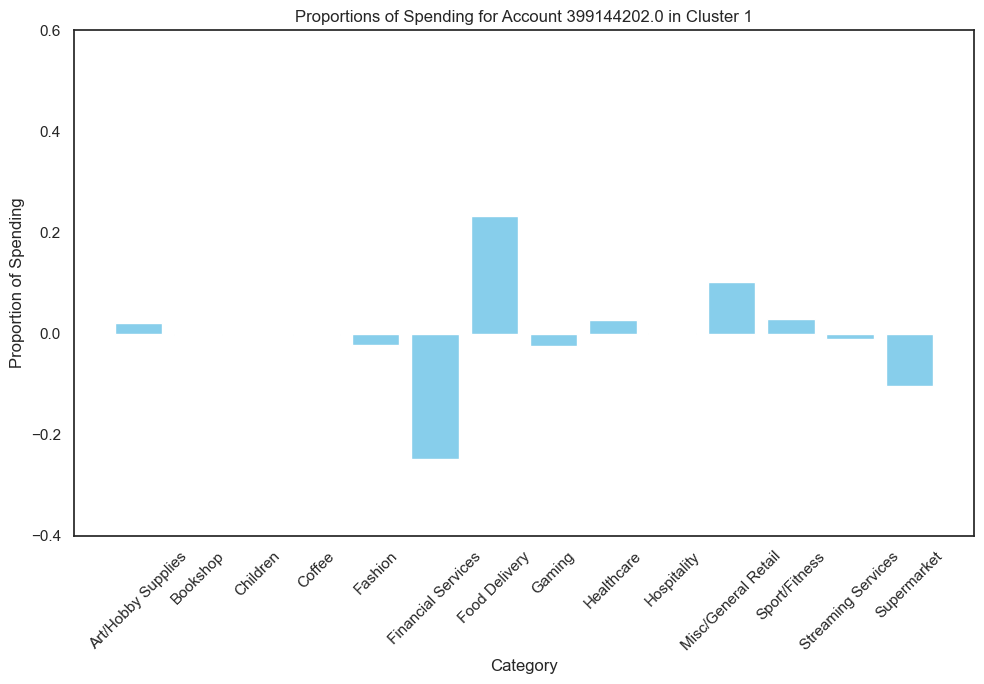

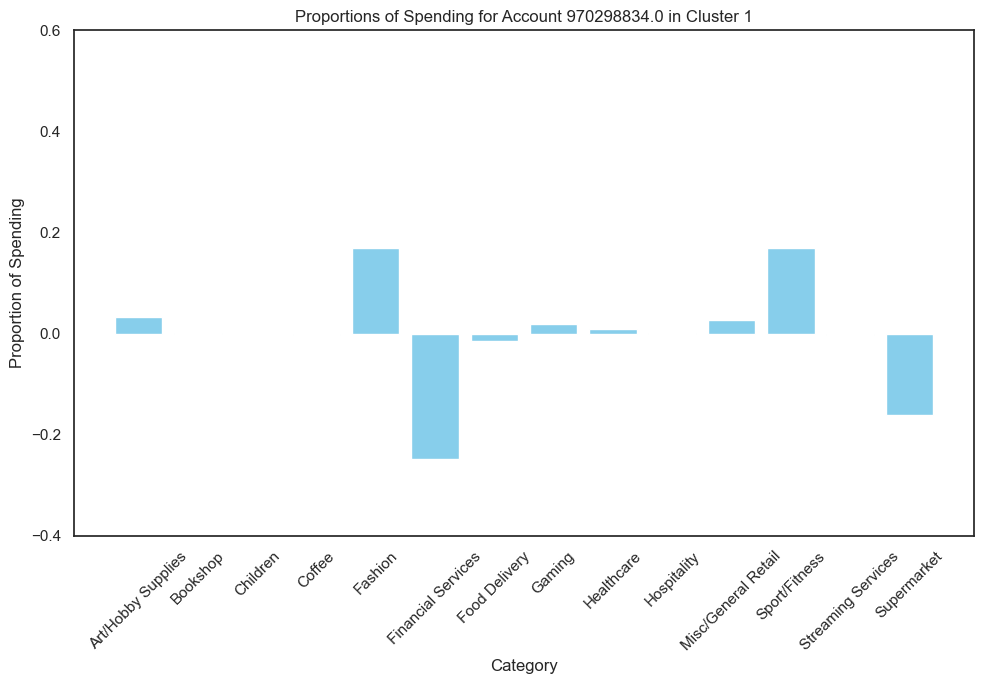

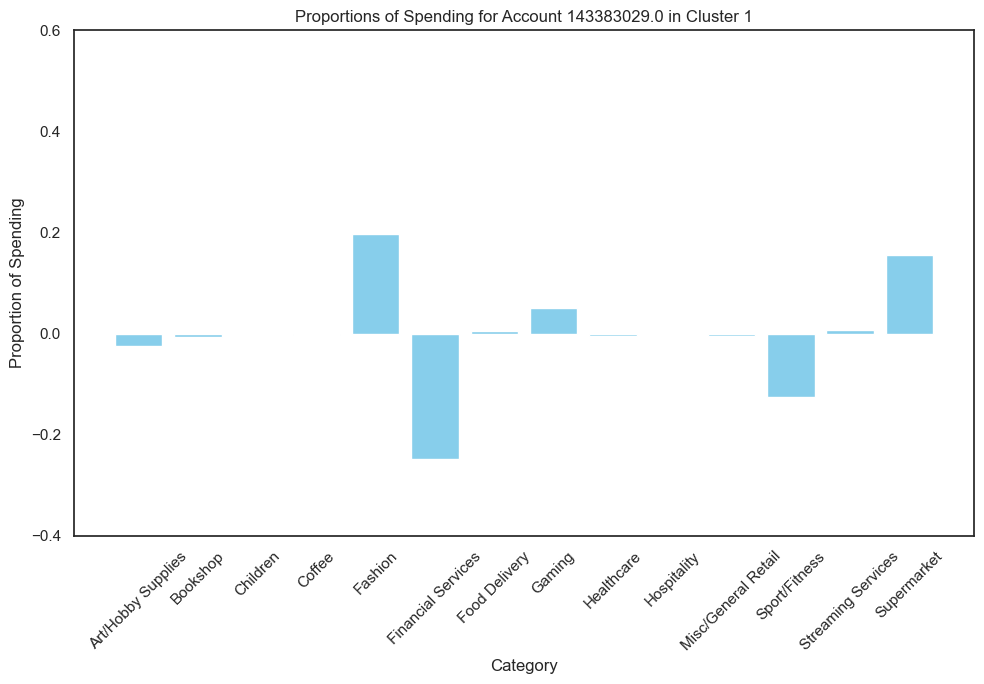

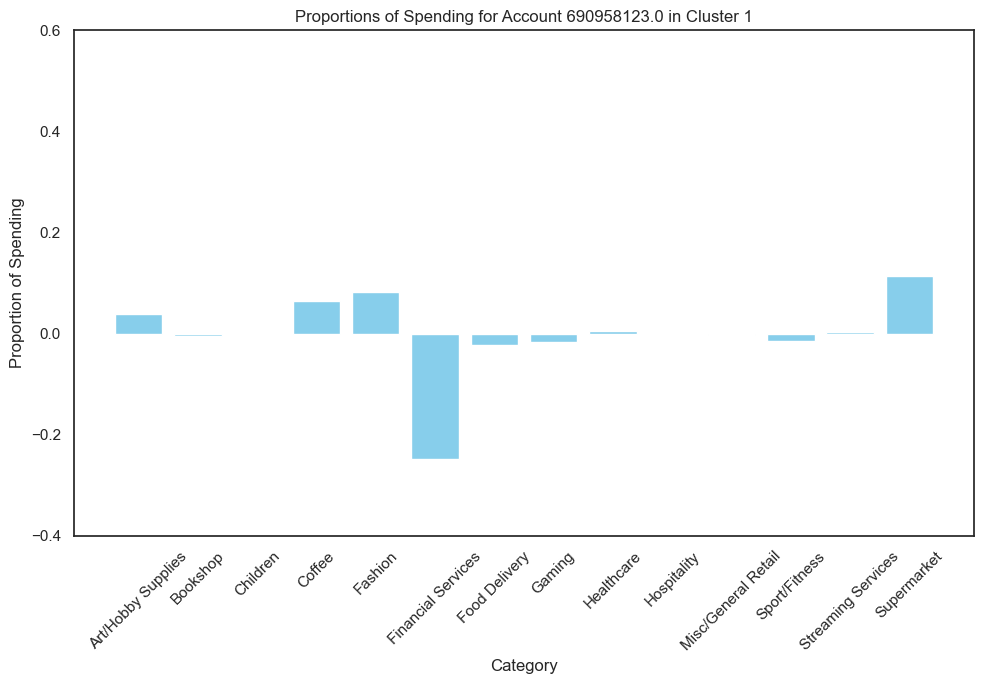

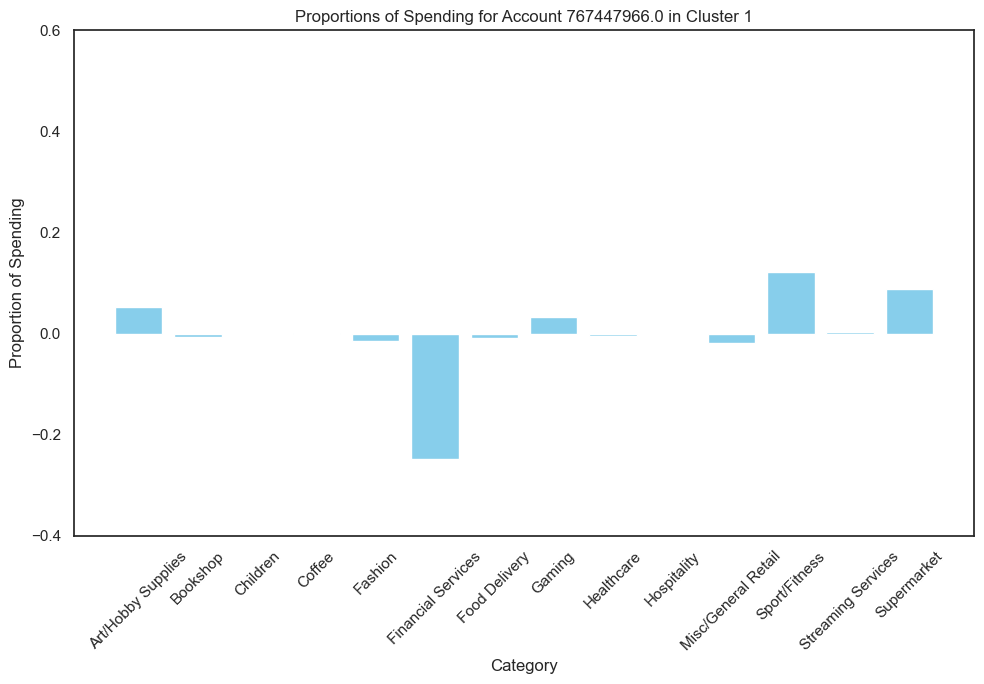

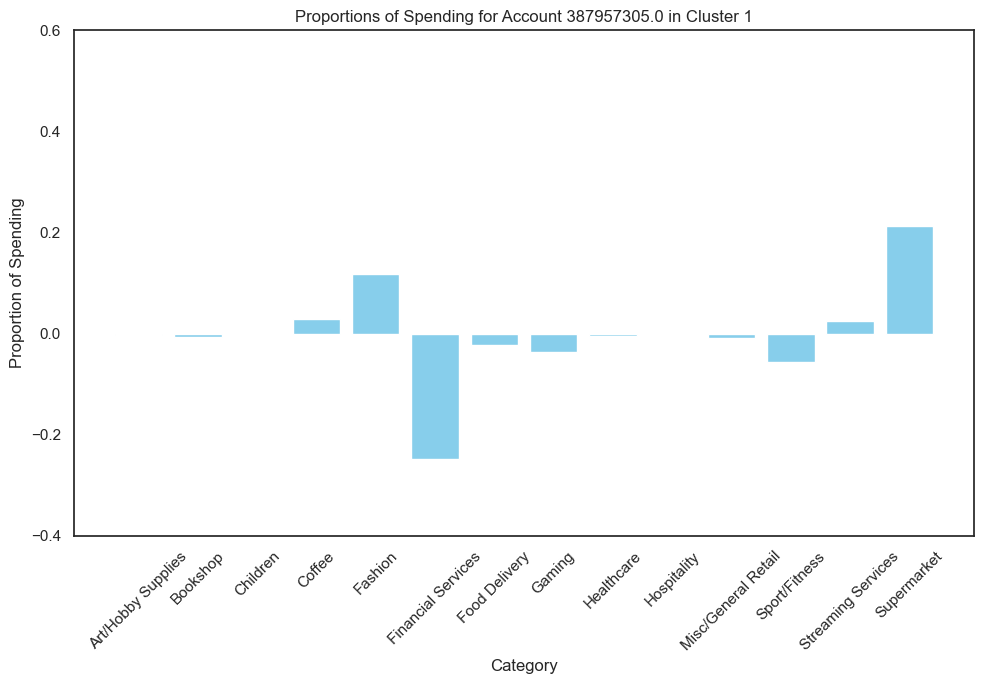

In [42]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 7))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.4, 0.6)
    plt.tight_layout()
    plt.show()

Only 2 clusters, financial services seems to vary quite alot, could be referring to account trransfers meaning accounts with only 1 accoun will be significantly lower than the others, this couls result in it dominating the UMAP, can try without.

### Clustering without financial services category 

In [43]:
spending_data_no_fs = pd.read_csv('C:/Users/camer/OneDrive/Documents/Data Science MSc/DSMP/New_data_proportional_spending_NO_FS.csv')
spending_data_no_fs.head()

,Account No,Art/Hobby Supplies,Bookshop,Children,Coffee,Fashion,Food Delivery,Gaming,Healthcare,Hospitality,Misc/General Retail,Sport/Fitness,Streaming Services,Supermarket
0,101531259.0,0.032309,-0.008692,-0.000271,-0.003773,-0.000623,-0.022710,-0.048969,-0.006649,-0.000859,-0.049264,0.111657,-0.008300,0.006143
1,104832000.0,-0.032050,-0.008692,-0.000271,-0.003773,-0.305412,-0.002246,0.129168,-0.005532,-0.000859,-0.049102,0.036188,0.008024,0.234558
2,105375973.0,-0.032050,0.037217,-0.000271,-0.003773,0.037611,-0.021168,-0.048969,0.000207,0.000422,0.216883,0.108983,-0.002240,-0.292852
3,106601471.0,-0.032050,0.017005,-0.000271,-0.003773,0.196775,0.016754,0.072510,0.013847,0.002214,0.035055,-0.136607,0.003377,-0.184835
4,108481285.0,0.004435,0.002007,-0.000271,-0.003773,0.077512,-0.029035,-0.048969,0.049971,-0.000859,0.137655,0.012739,-0.013769,-0.187643


In [44]:
X = spending_data_no_fs.drop('Account No', axis=1)

(976, 2)


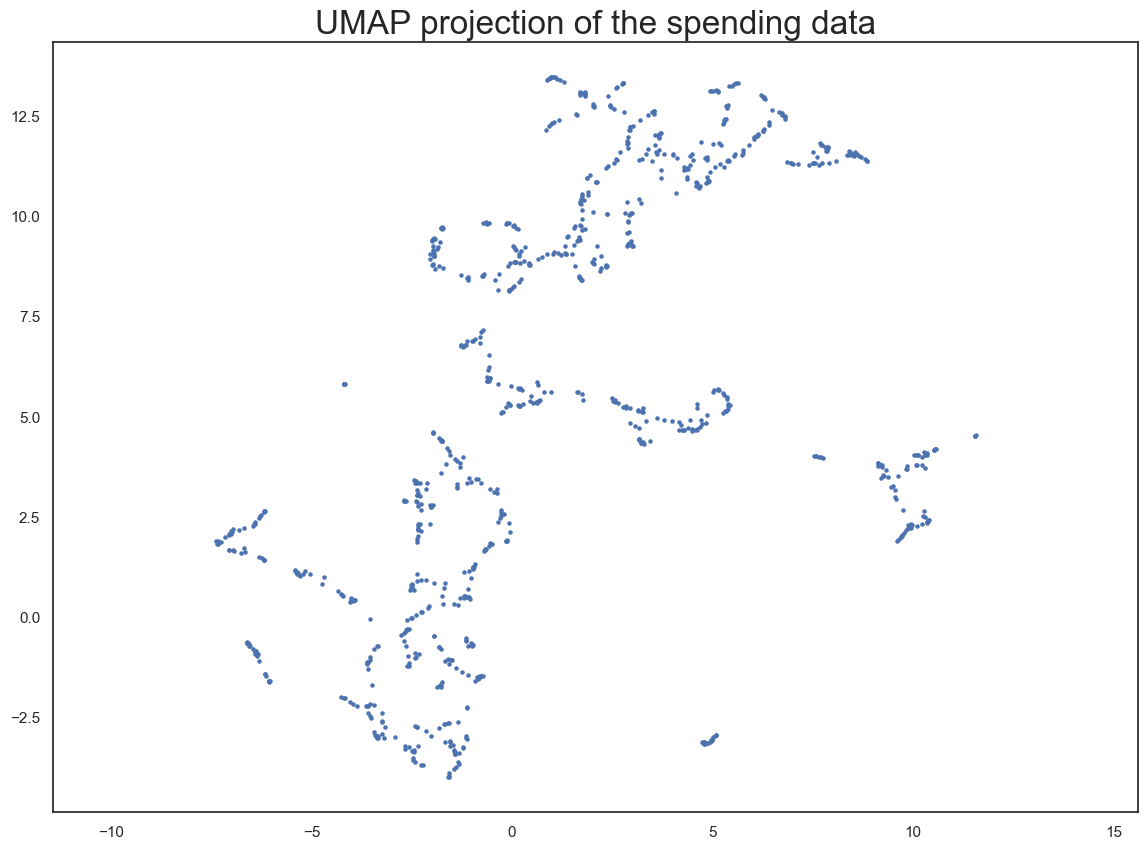

In [51]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

umap_model = umap.UMAP(n_neighbors = 4, min_dist = 0.05)

spending_umap = umap_model.fit_transform(X)
print(spending_umap.shape)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spending data', fontsize=24);

In [108]:
hdb = HDBSCAN(min_samples=1, min_cluster_size= 50)

cluster_labels = hdb.fit_predict(spending_umap)

spending_data_no_fs['cluster_label'] = cluster_labels

spending_data_no_fs['cluster_label'].value_counts()

cluster_label
 2    383
 1    341
 0     77
 4     70
 3     57
-1     48
Name: count, dtype: int64

C:\Users\camer\AppData\Local\Temp\ipykernel_1184\1681923908.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', np.max(cluster_labels) + 1)


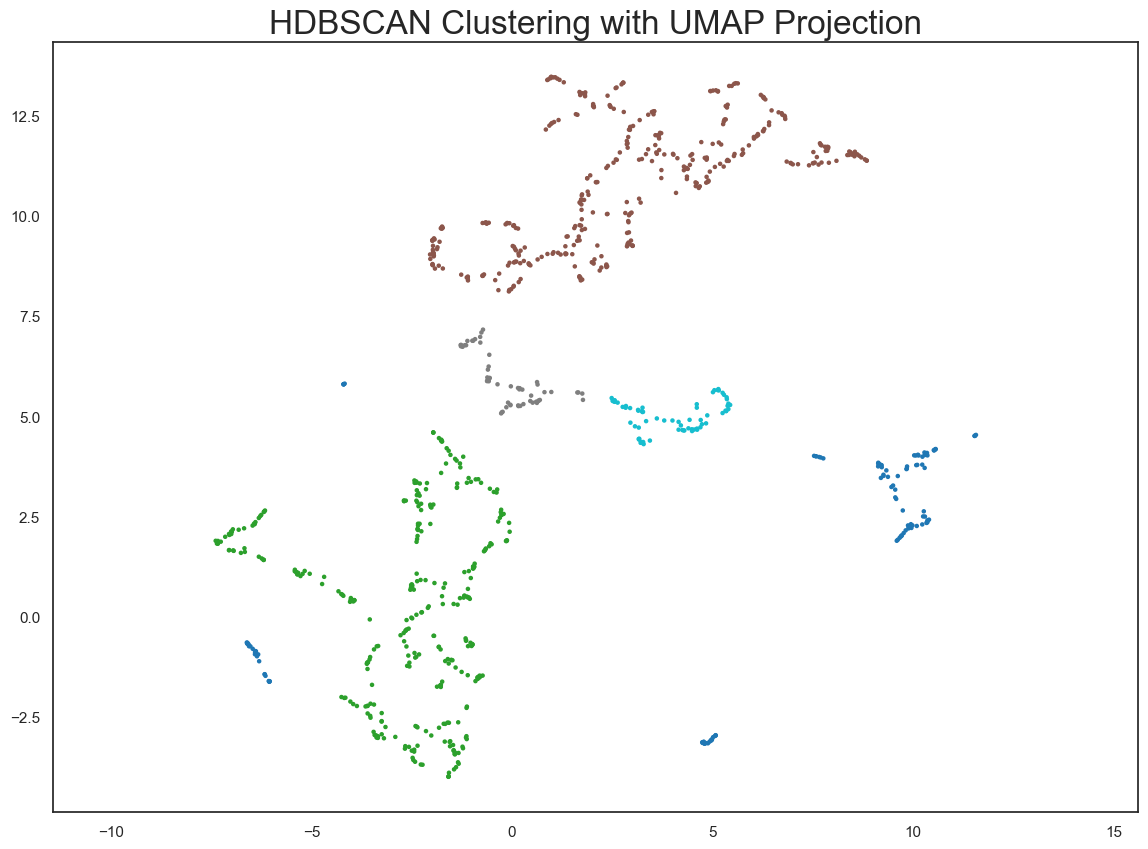

In [109]:
cmap = plt.cm.get_cmap('tab10', np.max(cluster_labels) + 1)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=[cmap(label) for label in cluster_labels],
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()

In [110]:
cluster_of_interest = 3

accounts_in_cluster = spending_data_no_fs[spending_data_no_fs['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=6)

sample_accounts.set_index('Account No', inplace=True)
sample_accounts

,Art/Hobby Supplies,Bookshop,Children,Coffee,Fashion,Food Delivery,Gaming,Healthcare,Hospitality,Misc/General Retail,Sport/Fitness,Streaming Services,Supermarket,cluster_label
Account No,,,,,,,,,,,,,,
668175891.0,0.046245,0.009241,-0.000271,-0.003773,-0.079451,-0.031839,-0.019142,-0.003163,0.000055,0.035058,0.215340,-0.008489,-0.159810,3
858560423.0,0.058273,-0.008692,-0.000271,-0.003773,0.017018,-0.031010,0.004288,-0.006649,-0.000859,-0.019169,0.101047,-0.006310,-0.103891,3
971010829.0,0.019735,0.017842,-0.000271,-0.003773,-0.088444,0.006524,-0.048969,-0.001676,-0.000859,0.125797,0.222089,-0.021299,-0.226696,3
779946617.0,-0.000475,-0.006554,-0.000271,-0.003773,0.039569,-0.016344,0.052535,0.025018,0.013857,0.022157,-0.007511,-0.008464,-0.109743,3
548907062.0,0.086091,0.004785,-0.000271,-0.003773,0.026777,-0.031603,0.008965,-0.005093,-0.000859,-0.033126,0.093320,-0.009199,-0.136011,3
857997794.0,0.146110,0.069514,-0.000271,-0.003241,-0.057778,-0.028417,-0.029974,-0.003710,-0.000859,-0.014177,0.050688,-0.006287,-0.121597,3


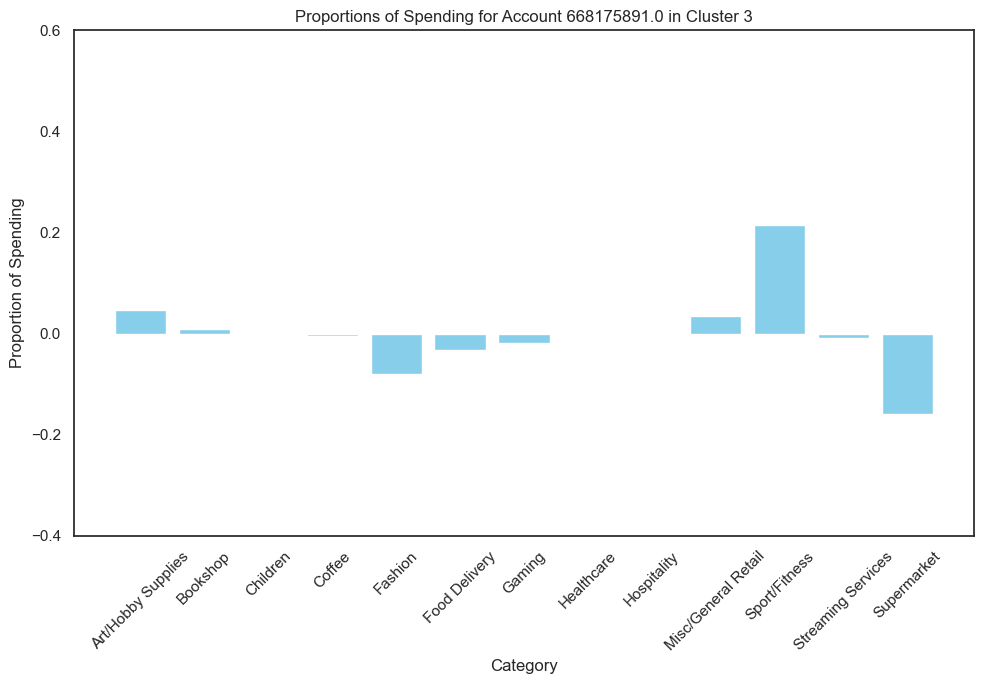

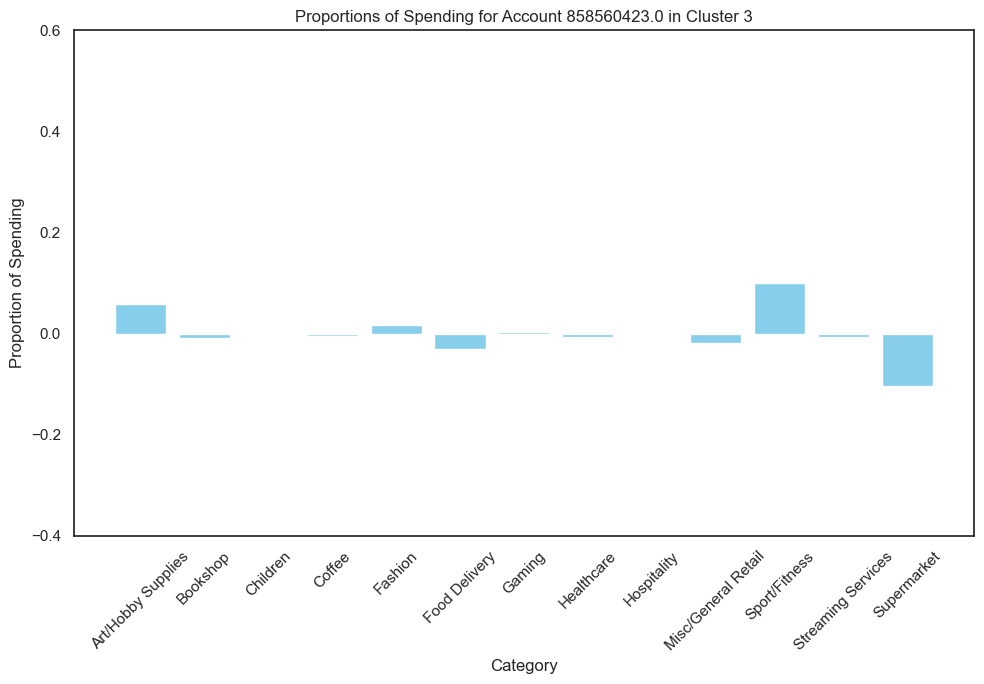

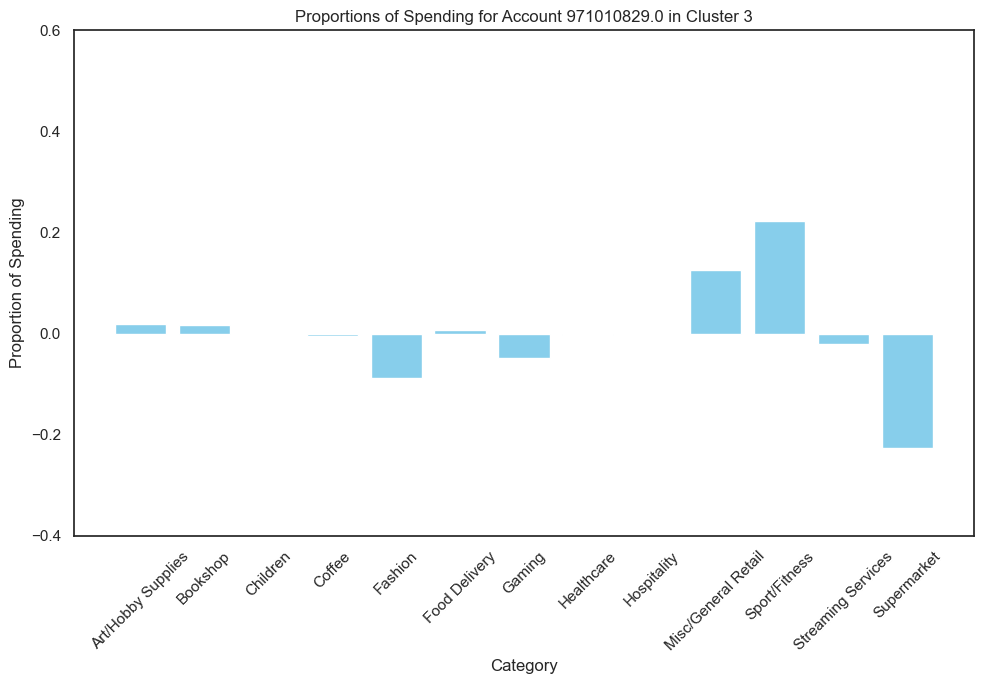

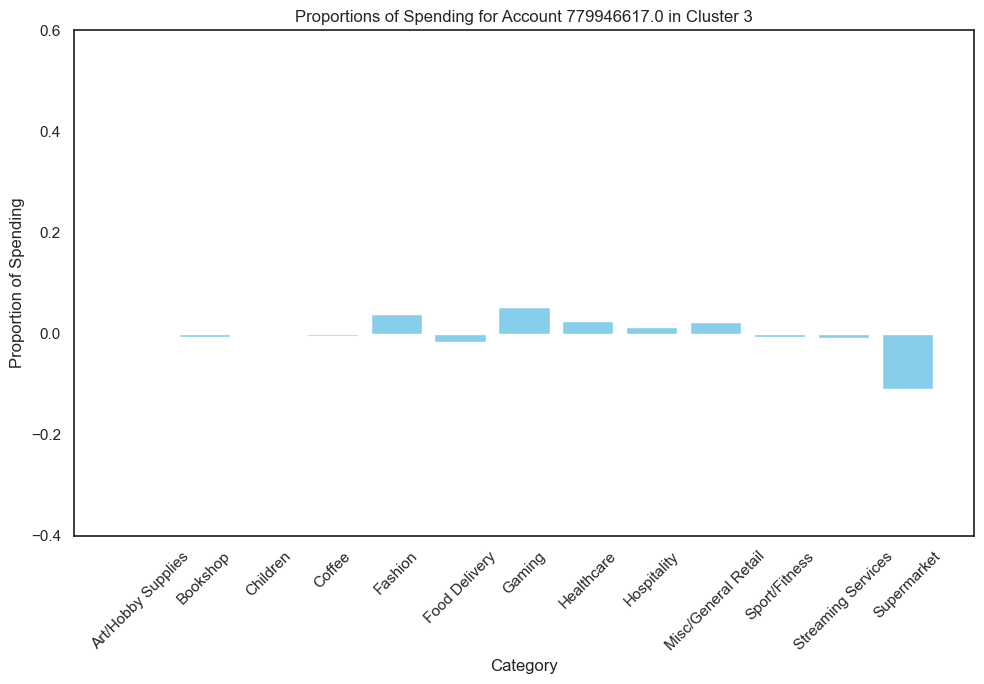

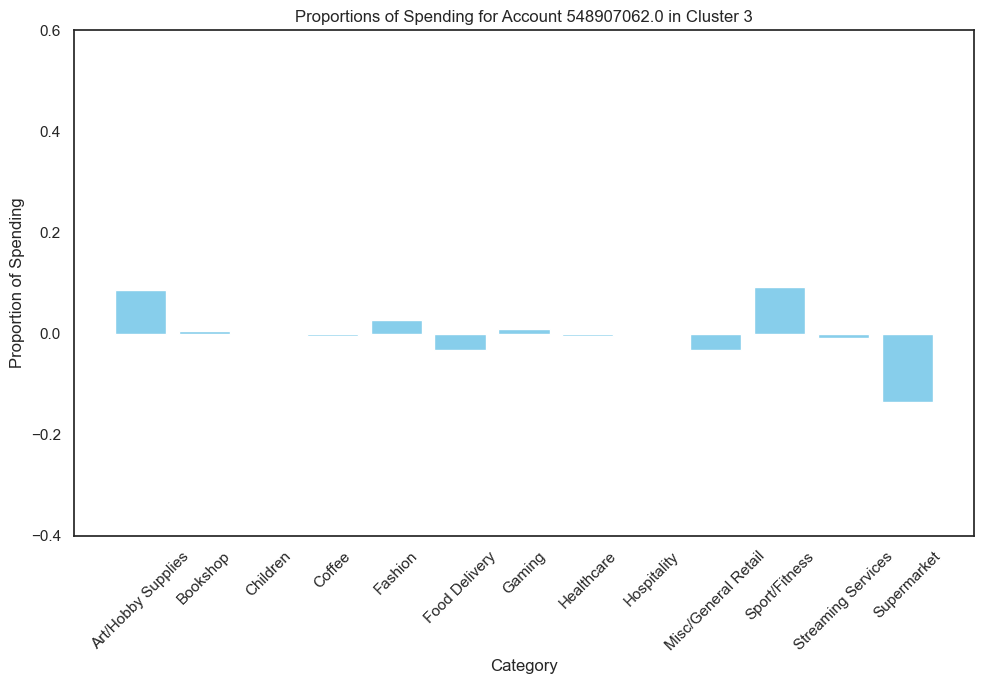

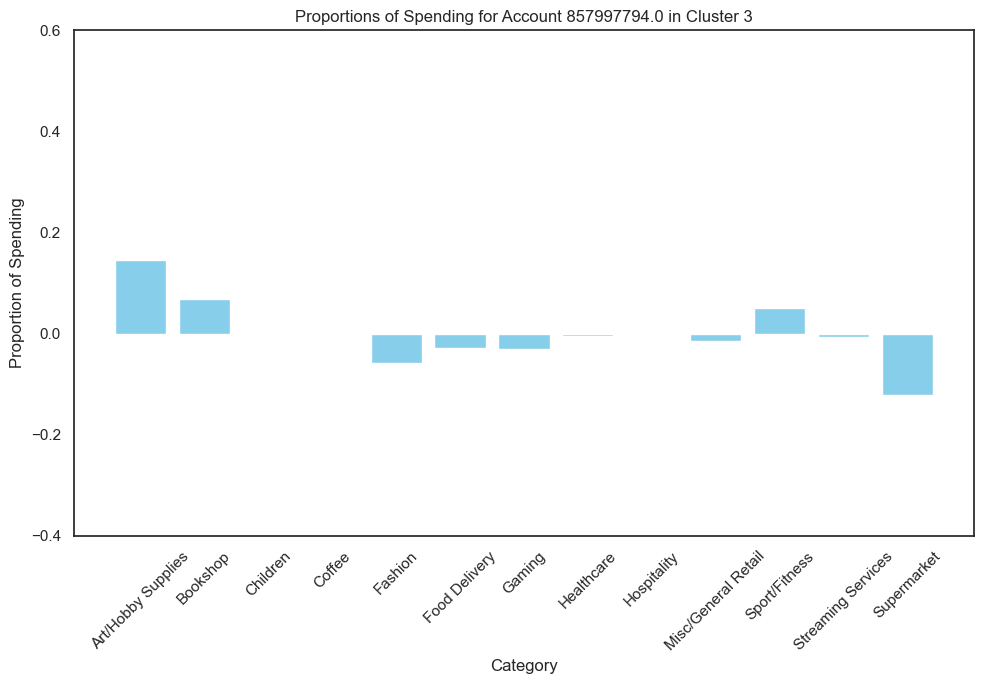

In [111]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 7))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.4, 0.6)
    plt.tight_layout()
    plt.show()